# 1) Theory and Concepts

Batch normalization is a technique used to normalize the inputs of each layer in an ANN. It operates on mini-batches of data during training. The normalization is done by subtracting the mean and dividing by the standard deviation of the batch. This process helps to stabilize and speed up the training process.

The benefits of using batch normalization during training are as follows:

1) Improved convergence: By normalizing the inputs, batch normalization reduces the internal covariate shift, which can cause the network to converge slowly. It helps the network to converge faster by ensuring that each layer's inputs have a similar distribution throughout the training process.

2) Stabilized gradients: Batch normalization reduces the magnitude of gradients, making them less likely to explode or vanish during backpropagation. This allows for more stable training, especially in deeper networks.

3) Reduced dependency on weight initialization: Batch normalization makes ANNs less sensitive to the initial weights' values. It helps prevent the network from getting stuck in poor local minima by ensuring that the inputs to each layer are normalized within each mini-batch.

4) Regularization effect: Batch normalization adds a slight amount of noise to the network during training. This noise acts as a form of regularization, reducing overfitting and improving generalization.

5) Higher learning rates: Batch normalization allows for the use of higher learning rates without causing the network to diverge. This speeds up the training process and helps the network find better solutions.

The working principle of batch normalization involves two main steps: normalization and learnable parameters.

1) Normalization: In this step, the inputs to a layer are normalized within each mini-batch. The mean and standard deviation of the batch are calculated, and the inputs are centered around the mean and scaled by the standard deviation. This ensures that the inputs have zero mean and unit variance.

2) Learnable parameters: After normalization, the normalized inputs are further scaled and shifted by learnable parameters. These parameters, known as gamma (γ) and beta (β), are introduced to allow the network to learn the optimal scale and shift for each normalized input. The network can learn to adapt the normalization to the specific requirements of the data.

During training, the mean and standard deviation used for normalization are estimated based on the mini-batch statistics. During inference or evaluation, the population statistics (computed using the entire training set) or running averages of the mean and standard deviation are used for normalization.

By incorporating batch normalization into ANNs, the network's performance can be significantly improved, leading to faster convergence, better generalization, and improved stability during training.

# 2) Implimentaion

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Preprocessing the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoded vectors
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# Step 2: Implementing a feedforward neural network without batch normalization
model_no_bn = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model without batch normalization
model_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_no_bn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 3: Implementing a feedforward neural network with batch normalization
model_bn = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model with batch normalization
model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 4: Compare the training and validation performance
_, accuracy_no_bn = model_no_bn.evaluate(test_images, test_labels)
_, accuracy_bn = model_bn.evaluate(test_images, test_labels)

print('Accuracy without batch normalization:', accuracy_no_bn)
print('Accuracy with batch normalization:', accuracy_bn)


2023-06-29 16:28:29.286013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 16:28:29.362343: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 16:28:29.365341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 16:28:30.569831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2443 - accuracy: 0.9291 - val_loss: 0.1224 - val_accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1045 - accuracy: 0.9683 - val_loss: 0.0929 - val_accuracy: 0.9723
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.0890 - val_accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0565 - accuracy: 0.9816 - val_loss: 0.0696 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0790 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0872 - val_accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 0.0748 - val_accuracy:

# 3) Experimentaion and Analysiing:

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# Define a simple feedforward neural network
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Experiment with different batch sizes
batch_sizes = [32, 64, 128, 256]
history = {}

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=5, validation_data=(test_images, test_labels))
    history[batch_size] = h.history

    _, accuracy = model.evaluate(test_images, test_labels)
    print(f"Accuracy with batch size {batch_size}: {accuracy}\n")


Training with batch size: 32
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2382 - accuracy: 0.9303 - val_loss: 0.1205 - val_accuracy: 0.9641
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1001 - accuracy: 0.9699 - val_loss: 0.0871 - val_accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0801 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0777 - val_accuracy: 0.9758
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9755
Accuracy with batch size 32: 0.9754999876022339


Training with batch size: 64
Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0789 - val_accuracy: 0.9776
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0164

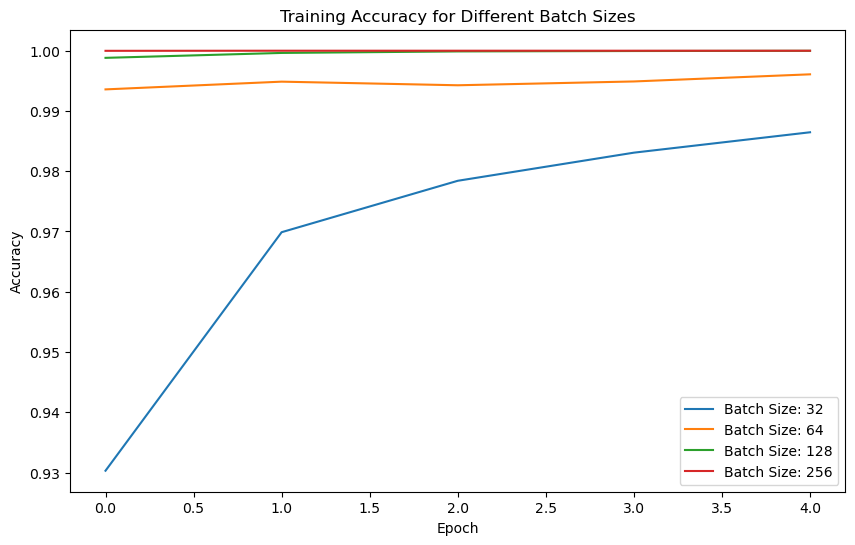

In [7]:
# Visualize training and validation accuracy
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(history[batch_size]['accuracy'], label=f'Batch Size: {batch_size}')
plt.title('Training Accuracy for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

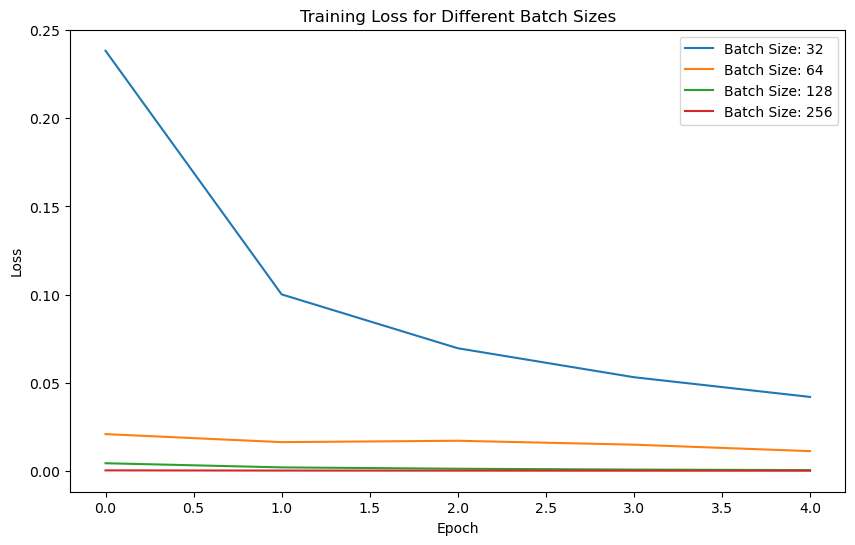

In [8]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(history[batch_size]['loss'], label=f'Batch Size: {batch_size}')
plt.title('Training Loss for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Print final accuracy for each batch size
for batch_size in batch_sizes:
    _, accuracy = model.evaluate(test_images, test_labels)
    print(f"Final Accuracy with batch size {batch_size}: {accuracy}\n")

313/313 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9813
Final Accuracy with batch size 32: 0.9812999963760376

313/313 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9813
Final Accuracy with batch size 64: 0.9812999963760376

313/313 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9813
Final Accuracy with batch size 128: 0.9812999963760376

313/313 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9813
Final Accuracy with batch size 256: 0.9812999963760376

